In [1]:
!pip install ffmpeg moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6084 sha256=7fd1cdef6652298f1eec0fd66208a478eb1e0f08c4c5c3b5fbd32b7a03804a95
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [2]:
import sys
import numpy as np

import math
import moviepy.editor as mp
from operator import itemgetter

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2768896/45929032 bytes (6.0%)6062080/45929032 bytes (13.2%)9216000/45929032 bytes (20.1%)12615680/45929032 bytes (27.5%)15908864/45929032 bytes (34.6%)18956288/45929032 bytes (41.3%)22126592/45929032 bytes (48.2%)24838144/45929032 bytes (54.1%)27656192/45929032 bytes (60.2%)30900224/45929032 bytes (67.3%)34144256/45929032 bytes (74.3%)37429248/45929032 bytes (81.5%)

In [7]:
def find_speaking(audio_clip, window_size=15, volume_threshold=0.3):

    num_windows = math.floor(audio_clip.end/window_size)

    window_is_silent = []
    for i in range(num_windows):
        s = audio_clip.subclip(i * window_size, (i + 1) * window_size)
        v = s.max_volume()
        window_is_silent.append(v < volume_threshold)

    start = 0
    end = 0
    speaking_intervals = []
    for i in range(1, len(window_is_silent)):
        if window_is_silent[i - 1] and not window_is_silent[i]:
            start = i * window_size

        if not window_is_silent[i - 1] and window_is_silent[i]:
            end = i * window_size
            new_speaking_interval = [start - 0.25, end + 0.25]
            need_to_merge = len(speaking_intervals) > 0 and new_speaking_interval[0] - 60 <= speaking_intervals[-1][0][1]
            if need_to_merge:
                merged_interval = [speaking_intervals[-1][0][0], new_speaking_interval[1]]
                speaking_intervals[-1] = (merged_interval, new_speaking_interval[1] - speaking_intervals[-1][0][0])
            else:
                element = (new_speaking_interval, new_speaking_interval[1] - new_speaking_interval[0])
                speaking_intervals.append(element)
    if len(speaking_intervals) != 0:
        return speaking_intervals
    else:
        return [([0, audio_clip.duration], audio_clip.duration)]

In [8]:
def find_longest_speaking_interval(speaking_intervals): 
    if len(speaking_intervals) > 0:
        maximum = max(speaking_intervals, key=itemgetter(1))[0] 
        return (maximum[0], maximum[1])
    else: 
        raise ValueError("EMPTY SPEAKING INTERVALS")

In [9]:
def get_sec_hours(time_str):
    """Get seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

def get_sec_minutes(time_str):
    """Get seconds from time."""
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)

def get_seconds(str_time):
    if len(str_time.split(':')) == 2:
        return get_sec_minutes(str_time)
    elif len(str_time.split(':')) == 3:
        return get_sec_hours(str_time)
    else:
        return int(str_time)

In [11]:
import pandas as pd
import datetime
df = pd.read_csv('dataset.csv', sep=';',header=None)

names = []
begin = []
end = []
correct_start = []
correct_end = []

print('=======================================')
for i in range(len(df)):
    video_name = 'drive/MyDrive/dataset/' + df.values[i][0]

    print(df.values[i][0])
    names.append(df.values[i][0])

    print("Correct Answer: ", get_seconds(df.values[i][1]), " - ", get_seconds(df.values[i][2]))
    correct_start.append(get_seconds(df.values[i][1]))
    correct_end.append(get_seconds(df.values[i][2]))

    clip = mp.VideoFileClip(video_name)
    audio = clip.audio

    a = find_speaking(audio)
       
    t1, t2 = find_longest_speaking_interval(a)

    begin.append(t1)
    end.append(t2)
    print("Sound Answer: ", t1, " - ", t2)
    print('=======================================')

2022-03-01 16_12 Параллельное программирование, 3ВШЭ, весна 2022.mp4
Correct Answer:  900  -  9844
Sound Answer:  869.75  -  9060.25
2022-04-19 16_55 ПМИ3 Высокопроизводительные вычисления.mp4
Correct Answer:  2190  -  8410
Sound Answer:  2159.75  -  5835.25
2022-05-16 19_29 ПМИ3 Высокопроизводительные вычисления.mp4
Correct Answer:  275  -  3885
Sound Answer:  164.75  -  180.25
2022-03-14 14_31 Software Design, лекция, ВШЭ3, весна 2022.mp4
Correct Answer:  550  -  5395
Sound Answer:  509.75  -  5385.25
2022-03-21 14_37 Software Design, лекция, ВШЭ3, весна 2022.mp4
Correct Answer:  270  -  5095
Sound Answer:  224.75  -  5115.25
2022-04-11 14_31 Software Design, лекция, ВШЭ3, весна 2022.mp4
Correct Answer:  845  -  5560
Sound Answer:  839.75  -  5565.25
2022-04-18 14_36 Software Design, лекция, ВШЭ3, весна 2022.mp4
Correct Answer:  345  -  5400
Sound Answer:  344.75  -  3675.25
2022-04-25 14_38 Software Design, лекция, ВШЭ3, весна 2022.mp4
Correct Answer:  500  -  7800
Sound Answer:  49

TypeError: ignored

In [12]:
print(begin)
print(end)

[869.75, 2159.75, 164.75, 509.75, 224.75, 839.75, 344.75, 494.75, 554.75, 314.75, 584.75, 479.75, 1379.75, 104.75, 3389.75, 239.75, 5114.75, 29.75, 59.75, 6659.75, 164.75, 1274.75, 3719.75, 569.75, 254.75, 2114.75, 1364.75, 329.75, 4244.75, 3269.75, 134.75, 2879.75, 1154.75, 599.75, 419.75, 3509.75, 1514.75, 134.75, 1094.75, 59.75, 569.75, 209.75, 584.75, 74.75, 134.75, 74.75, 614.75, 194.75, 224.75, 3794.75]
[9060.25, 5835.25, 180.25, 5385.25, 5115.25, 5565.25, 3675.25, 5430.25, 5355.25, 4425.25, 615.25, 3450.25, 6510.25, 4995.25, 5685.25, 6840.25, 5595.25, 6540.25, 360.25, 7500.25, 6270.25, 3390.25, 4515.25, 4275.25, 630.25, 5280.25, 2850.25, 4335.25, 5205.25, 4335.25, 6465.25, 6090.25, 2610.25, 11745.25, 525.25, 3960.25, 6270.25, 5205.25, 7830.25, 6795.25, 6600.25, 5760.25, 6750.25, 135.25, 2895.25, 2655.25, 1335.25, 5895.25, 5325.25, 5625.25]


In [15]:
result_data = np.array([correct_start, correct_end, begin, end])
result_data_transpose = result_data.transpose()
np.savetxt("sound_results.csv", result_data_transpose, fmt="%d", delimiter=";")

In [16]:
diff = pd.read_csv('sound_results.csv', sep=';',header=None)
diff_start = []
start_level = []
diff_end = []
end_level = []
for i in range(len(diff)):
    start_level.append(1)
    diff_start.append(abs(int(diff.values[i][0]) - int(diff.values[i][2])))
    end_level.append(2)
    diff_end.append(abs(int(diff.values[i][1]) - int(diff.values[i][3])))

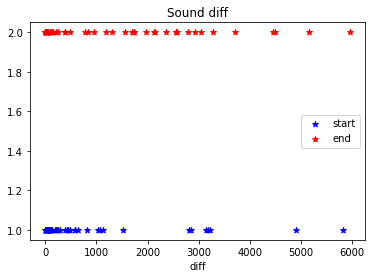

In [21]:
import matplotlib.pyplot as plt
  
plt.scatter(diff_start, start_level, label= "start", color= "blue", 
            marker= "*")

plt.scatter(diff_end, end_level, label= "end", color= "red", 
            marker= "*")
  
plt.xlabel('diff')
plt.title('Sound diff')
plt.legend()
plt.show()